# **London Housing Analysis - Visualisations**

## Objectives

* Fetch data from clean data file to create visualisations using Matplotlib, Seaborn and Plotly
* Derive conclusions based off of visualisations
* Challenge hypotheses using conclusions and visualisations

## Inputs

* Data from Clean Data CSV stored under the Clean Data folder

## Outputs

* Visualisations and conclusions from the data

 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\naqas\\OneDrive\\Documents\\Coding\\CI_Projects\\london-housing-analysis-project\\london_housing_analysis_project\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\naqas\\OneDrive\\Documents\\Coding\\CI_Projects\\london-housing-analysis-project\\london_housing_analysis_project'

# Import Packages required for visualisations

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import plotly.io as pio

---

# Import Clean Data set

Now that the data has been cleaned, it needs to be imported for use in the visualisations. A new dataframe will be created to store this clean data.

In [5]:
clean_london_housing_data_df = pd.read_csv("dataFiles/CleanData/monthly_data_clean_version.csv")
clean_london_housing_data_df

,date,area,average_price,houses_sold,no_of_crimes,year
0,2001-01-01,barking and dagenham,82343,215,1771,2001
1,2001-01-02,barking and dagenham,83266,238,1600,2001
2,2001-01-03,barking and dagenham,84058,274,1759,2001
3,2001-01-04,barking and dagenham,83965,241,1643,2001
4,2001-01-05,barking and dagenham,85124,283,1809,2001
...,...,...,...,...,...,...
7259,2019-01-07,westminster,957897,168,6991,2019
7260,2019-01-08,westminster,914870,156,7069,2019
7261,2019-01-09,westminster,925955,169,6384,2019
7262,2019-01-10,westminster,927864,168,7208,2019


---

# _Matplotlib_

Using the clean data, a variable must be created to create a sum of all crimes per year for all areas. This will allow us to asses the total crimes occurring per year in London over the 2001-2019 period.

In [6]:
crimes_per_year = clean_london_housing_data_df.groupby(["area","year"])["no_of_crimes"].sum().reset_index()

Now, a bar chart must be created to visualise the data. An "edgecolor" was defined as "none" because whitelines were appearing across the bars. Presumably, this occurred because the boroughs were being shown separately in one bar, however, it is preferred to see them all as one bar and with no separations as it is an analysis from across the city as a whole. Also, the years were being displayed as the follows: "2001.0" even though they are stored as integers. After some research it was deemed better to convert the values to string to make the graph cleaner and easier to visualise.

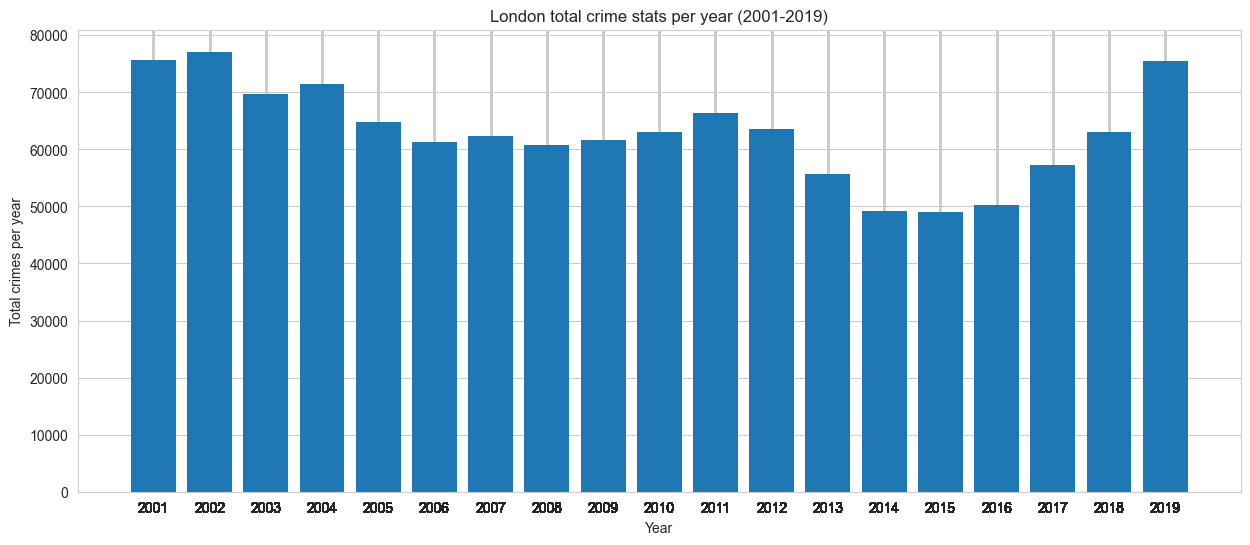

In [7]:
plt.figure(figsize=(15,6))
plt.bar(crimes_per_year["year"], crimes_per_year["no_of_crimes"], edgecolor = "none")
plt.xticks(
    clean_london_housing_data_df["year"],
    clean_london_housing_data_df["year"].astype(str)
)

plt.xlabel("Year")
plt.ylabel("Total crimes per year")
plt.title("London total crime stats per year (2001-2019)")
plt.show()

Following this, a variable must be created for the sum of all houses sold per year from all areas.This will allow us to asses the total houses sold per year in all the London boroughs over the 2001-2019 period.

In [8]:
houses_sold_per_year = clean_london_housing_data_df.groupby(["area","year"])["houses_sold"].sum().reset_index()

Now a bar chart has to be created to visualise this data. The cosmetic changes made to the previous graph have been continued here.

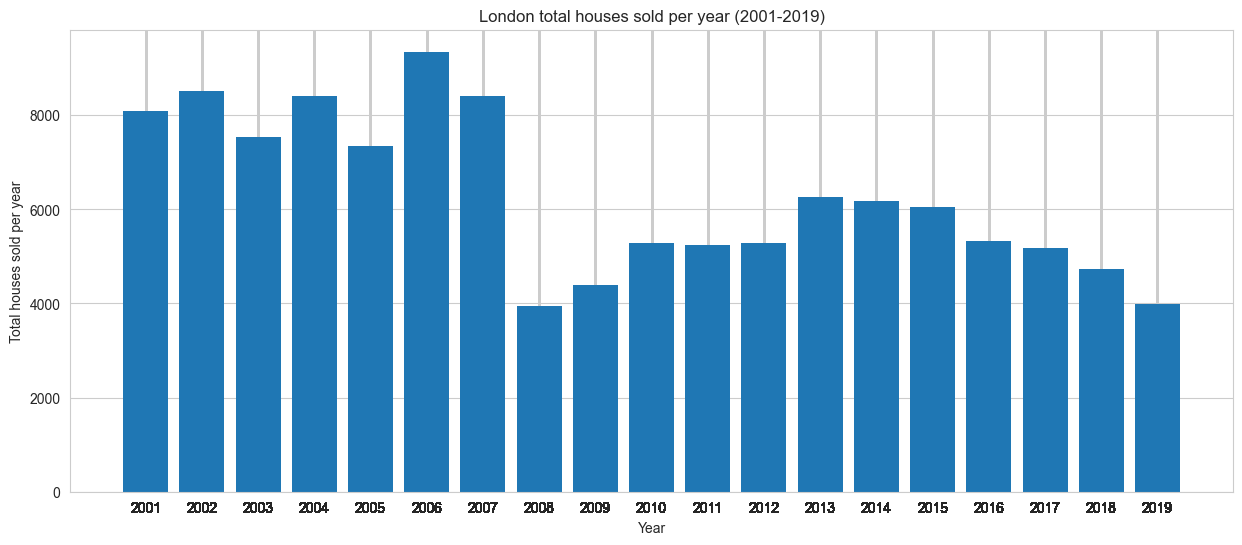

In [9]:
plt.figure(figsize=(15,6))
plt.bar(houses_sold_per_year["year"], houses_sold_per_year["houses_sold"], edgecolor = "none")
plt.xticks(
    clean_london_housing_data_df["year"],
    clean_london_housing_data_df["year"].astype(str)
)

plt.xlabel("Year")
plt.ylabel("Total houses sold per year")
plt.title("London total houses sold per year (2001-2019)")
plt.show()

When both bar charts are analysed initially, it does not seem like there is a trend across all of London with crimes and houses sold. However, when analysed further it can be seen that when there is an increase in crime, then concurrently there is a decrease in houses sold in the following year. When 2002 has an increase in crime from 2001, then the following year of 2003 sees a drop in houses sold. Then when there is a decrease in crime from 2002 to 2003 then the following year (2004) there is an increase in houses sold. This shows that there is a correlation between the crime rate and the amount of houses that are sold in London. 

---

# _Seaborn_

A graph is required to show the crime rate and rate of houses sold in each area to compare the trends over the period between 2001-2019. A facet grid is used as it creates multiple subplots within a grid layout. This makes it clear to compare all the boroughs together.

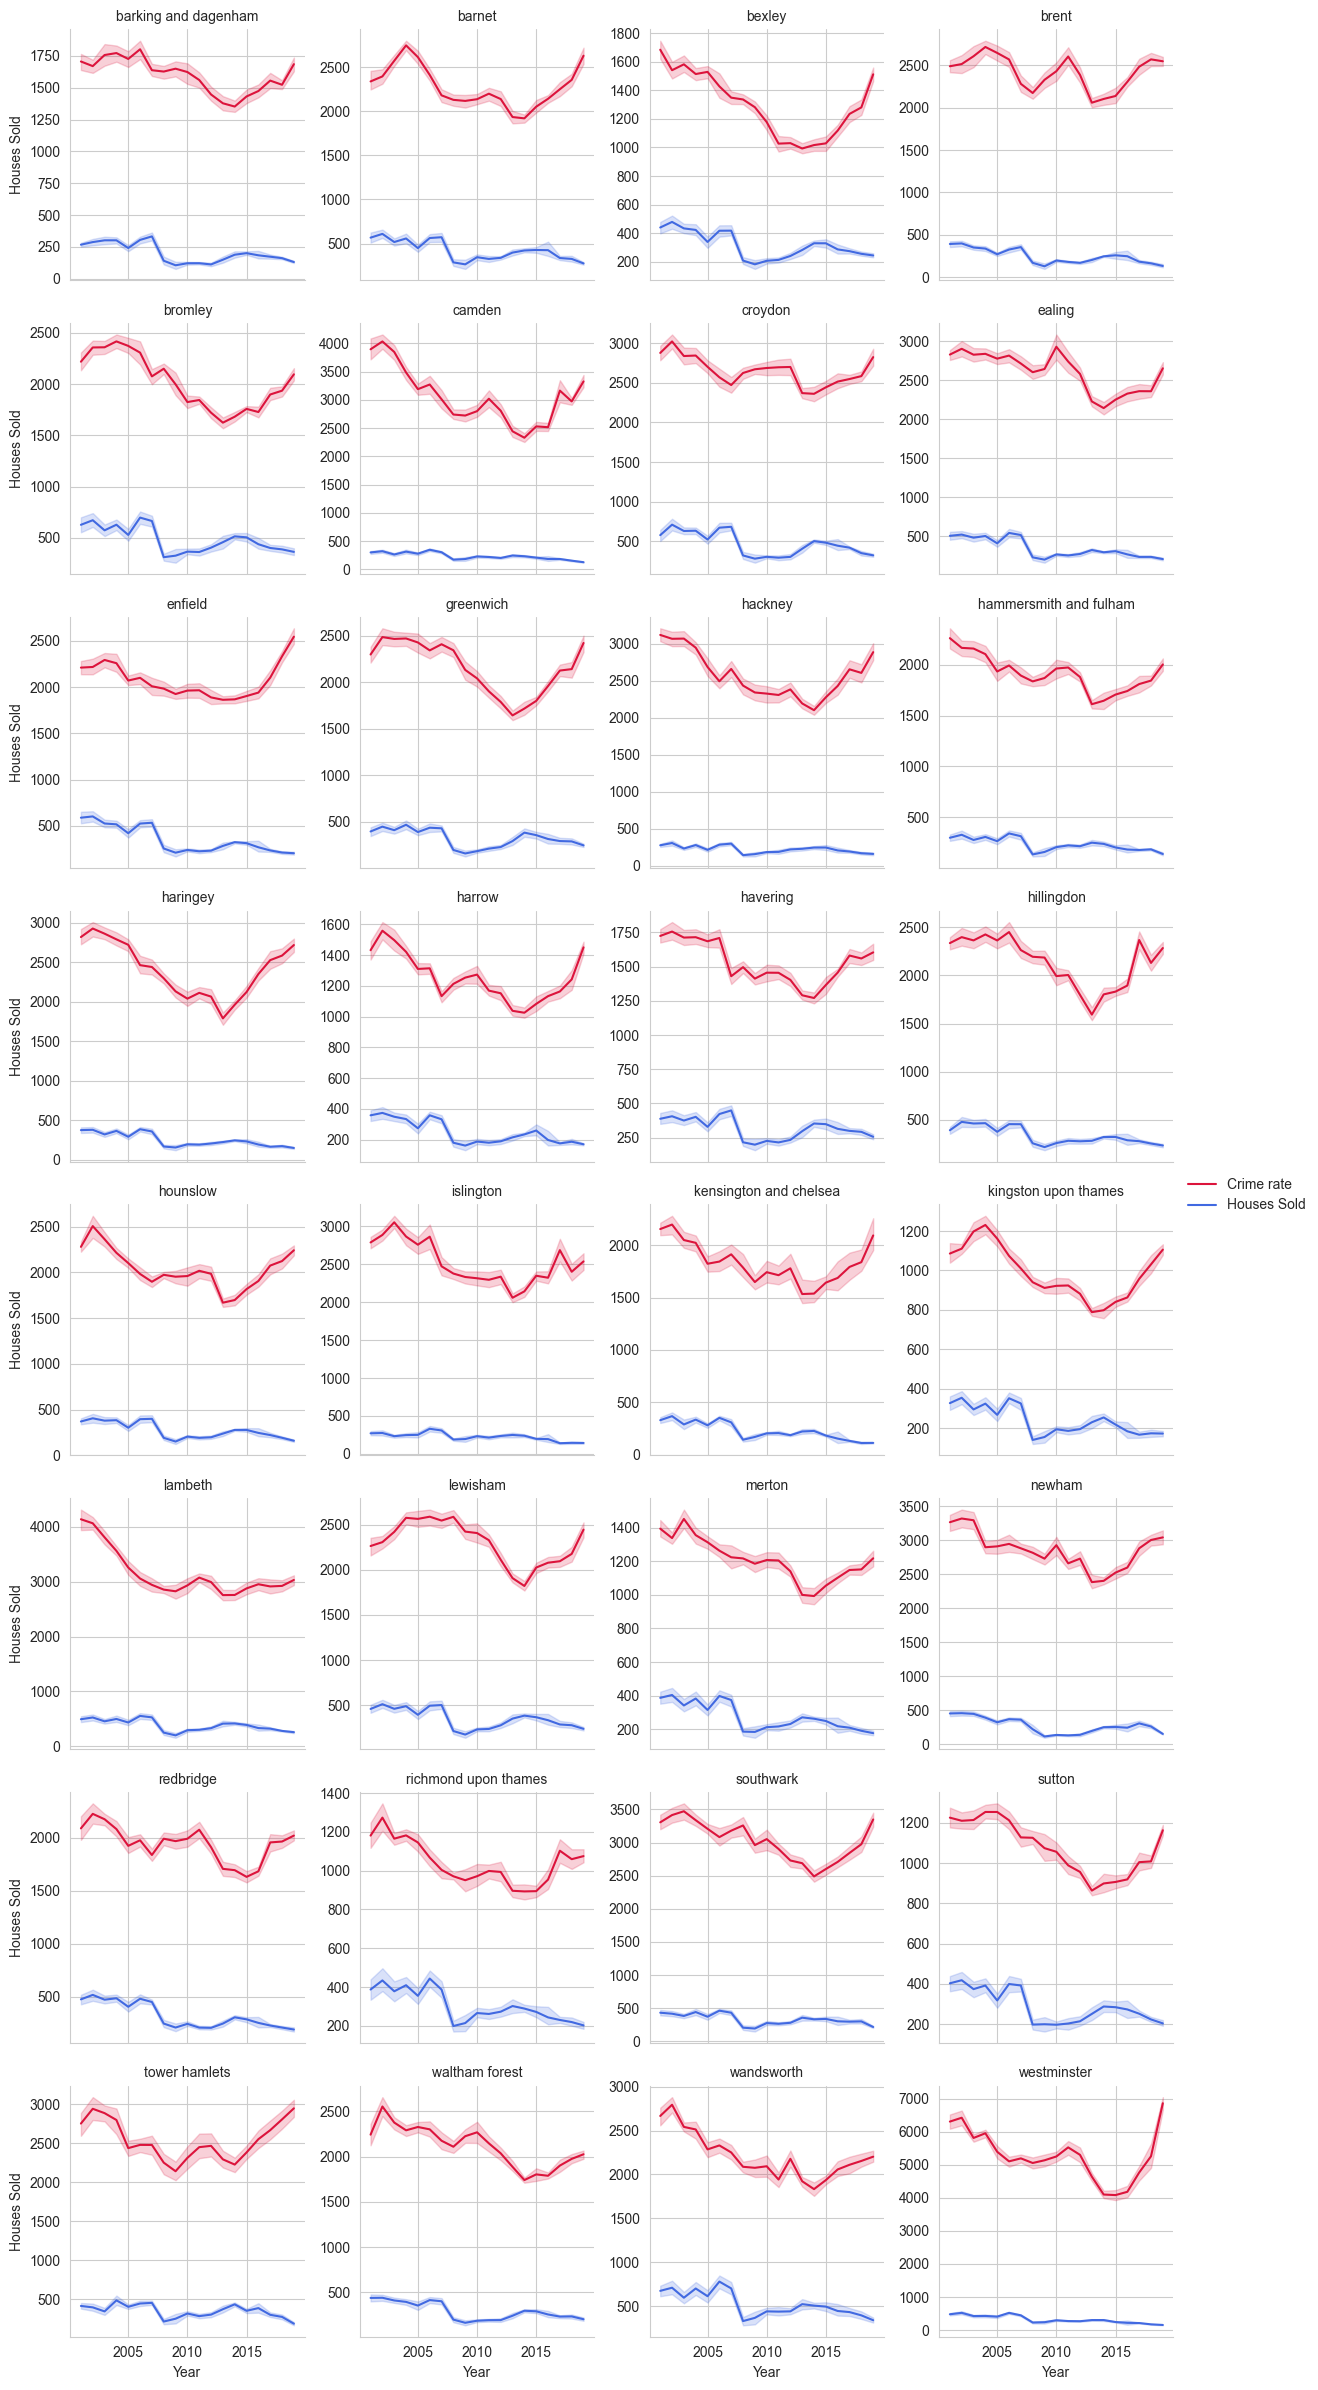

In [52]:
borough_facetgrid = sns.FacetGrid(clean_london_housing_data_df, col="area", col_wrap=4, height=3, sharey=False)

borough_facetgrid.map(sns.lineplot, "year", "no_of_crimes",color= "crimson", label="Crime rate")
borough_facetgrid.map(sns.lineplot, "year", "houses_sold", color= "royalblue", label="Houses Sold")

borough_facetgrid.add_legend()
borough_facetgrid.set_axis_labels("Year", "Houses Sold")
borough_facetgrid.set_titles("{col_name}")

Although the y axis scales are not the same across all the subplots, it can still be seen that there is a trend where there is an increase in crime, there is a decrease in houses sold and vice versa.

Next it was important to create a heatmap for houses sold, average house price and number of crimes. This would allow us to visualise what the general trends across boroughs across the dataset period (2001-2019) are. First it is required to create pivot tables for each characteristic before creating the heatmap. Below are the pivot tables for each:

In [11]:
crime_pivot = clean_london_housing_data_df.pivot_table( index= "area", columns = "year", values = "no_of_crimes", aggfunc= "mean")

In [12]:
houses_sold_pivot = clean_london_housing_data_df.pivot_table( index= "area", columns = "year", values = "houses_sold", aggfunc= "mean")

In [13]:
house_price_average_pivot = clean_london_housing_data_df.pivot_table(index = "area", columns = "year", values="average_price", aggfunc="mean" )

Now the heatmaps can be formed from all the above pivot tables.

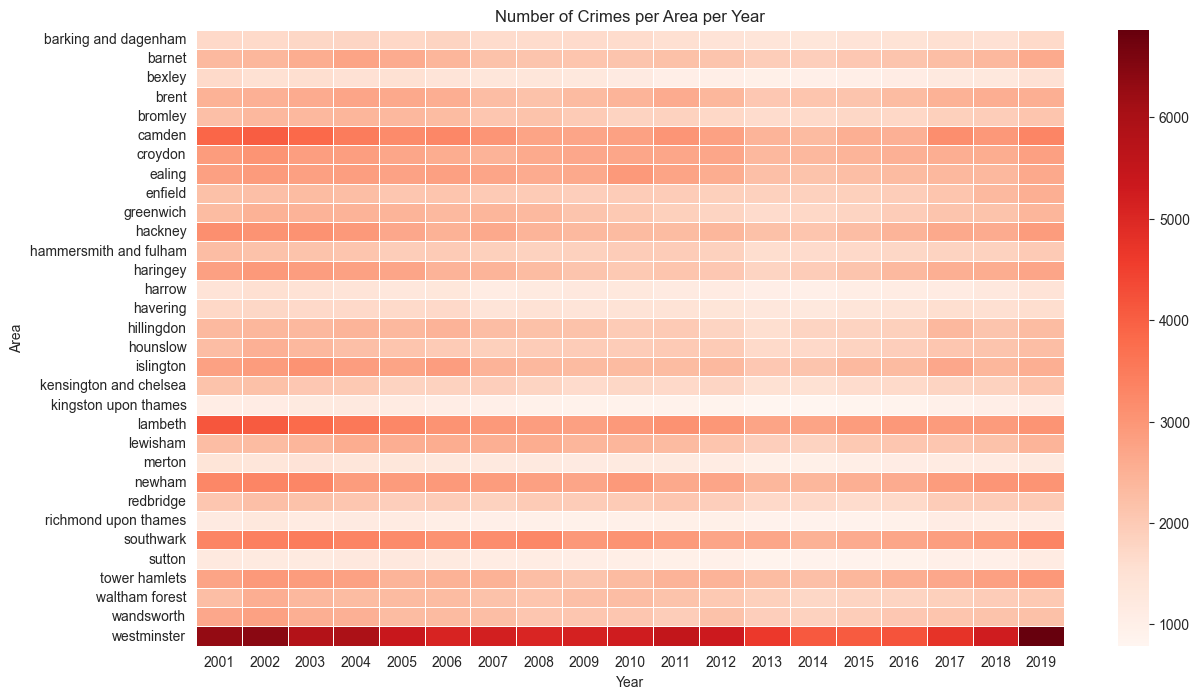

In [14]:
plt.figure(figsize=(14,8))

sns.heatmap(crime_pivot,cmap= "Reds", linewidths= 0.5)

plt.title("Number of Crimes per Area per Year")
plt.xlabel("Year")
plt.ylabel("Area")
plt.show()

The figure above shows the density of which boroughs have higher crime and how the rates change over the years for each borough. Westminster is shown to consistently have higher crime rates. This can be down to the high tourism in that area. This also means that this could potentially skew data and that future analyses of data like this may require in depth analysis of types of crimes as well as crime rates. 

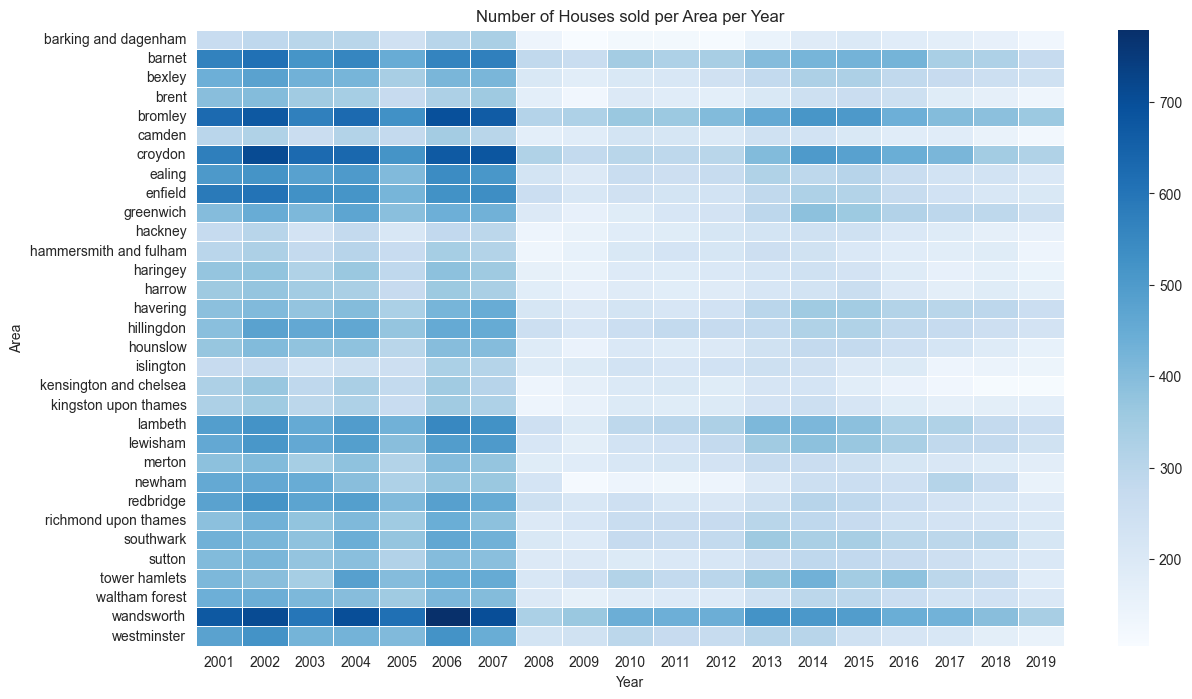

In [15]:
plt.figure(figsize=(14,8))

sns.heatmap(houses_sold_pivot, cmap= "Blues", linewidths= 0.5)

plt.title("Number of Houses sold per Area per Year")
plt.xlabel("Year")
plt.ylabel("Area")
plt.show()

The figure above shows which boroughs have had better housing markets and sold more houses over the years. The housing market in London seemed strong and stable prior to 2008. This is when the credit crash happens and we can see that the two years after (2008,2009) both experience an immense drop in housing sold throughout London. We can also see that the housing market for ALL boroughs does not ever recover to pre-2008 levels. This shows that there can be many other factors outside of just crime rates that can impact housing markets.

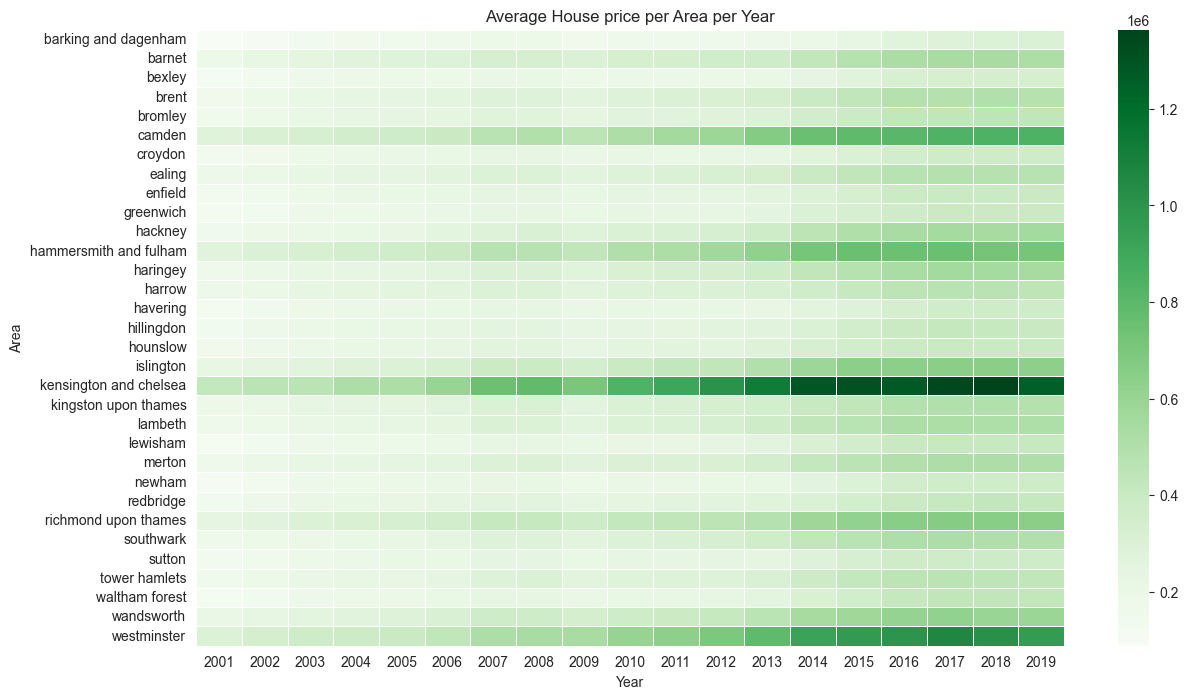

In [16]:
plt.figure(figsize=(14,8))

sns.heatmap(house_price_average_pivot, cmap= "Greens", linewidths= 0.5)

plt.title("Average House price per Area per Year")
plt.xlabel("Year")
plt.ylabel("Area")
plt.show()

The figure above shows the average house price in each borough over the years. There is a consistent upward linear trend with all boroughs where, as the years increase, average house prices gradually increase. This is a unique trend amongst all 3 heatmaps as it shows that regardless of the fluctuations of the housing market and crime in any area of London, house prices consistently show an increase over the years. 

Finally, scatter graphs are required to show the relationships between the different pieces of data. First, I will need to create averages for each area spanning the entire time period of 2001-2019. This will be done by grouping the data by area. Then a new variable will be created for each average that will access the necessary column and use a "mean" function to create an average of all the data in that column per area.

In [48]:
borough_average = (clean_london_housing_data_df.groupby("area", as_index=False)
                   .agg(crimes_average = ("no_of_crimes", "mean"),
                        houses_sold_average = ("houses_sold", "mean"), 
                        house_price_average = ("average_price", "mean"))
                        )

Now the scatter plots can be created to investigate any relationships in the data.

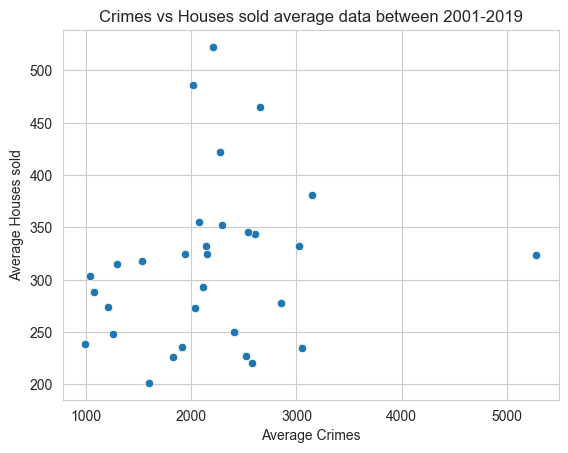

In [18]:
sns.scatterplot( data = borough_average, x="crimes_average", y= "houses_sold_average")
plt.title("Crimes vs Houses sold average data between 2001-2019")
plt.xlabel("Average Crimes")
plt.ylabel("Average Houses sold")
plt.show()

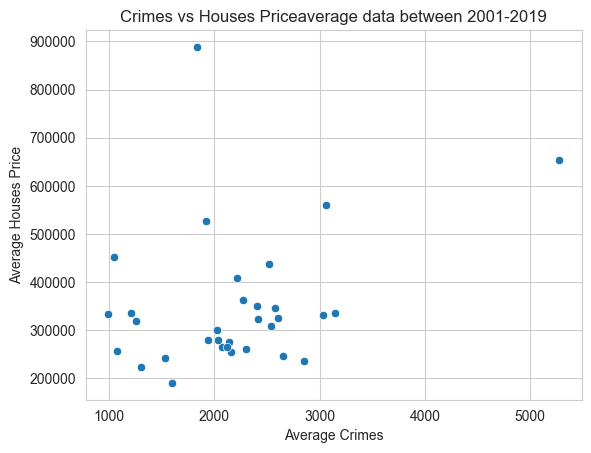

In [19]:
sns.scatterplot( data = borough_average, x="crimes_average", y= "house_price_average")
plt.title("Crimes vs Houses Priceaverage data between 2001-2019")
plt.xlabel("Average Crimes")
plt.ylabel("Average Houses Price")
plt.show()

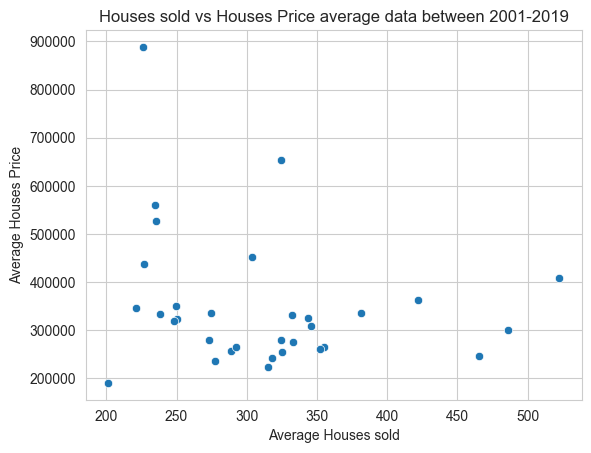

In [20]:
sns.scatterplot( data = borough_average, x="houses_sold_average", y= "house_price_average")
plt.title("Houses sold vs Houses Price average data between 2001-2019")
plt.xlabel("Average Houses sold")
plt.ylabel("Average Houses Price")
plt.show()

From the scatter plots produced, no correlation could be determined. This could be because London is such a large area that comparing it generally may not show conclusive date and so comparisons by borough may be better.


First a yearly average for each borough must be created.

In [49]:
borough_yearly_average = (clean_london_housing_data_df.groupby(["area", "year"], as_index = False)
                          .agg(yearly_crimes = ("no_of_crimes", "mean"),
                               yearly_houses_sold =("houses_sold","mean"), 
                               yearly_house_price_average = ("average_price", "mean") )
                               )

Now,  I will plot the data to facet grids of plots. This will show the data for each borough. I will also have a regression line to show correlation in each sub-plot.

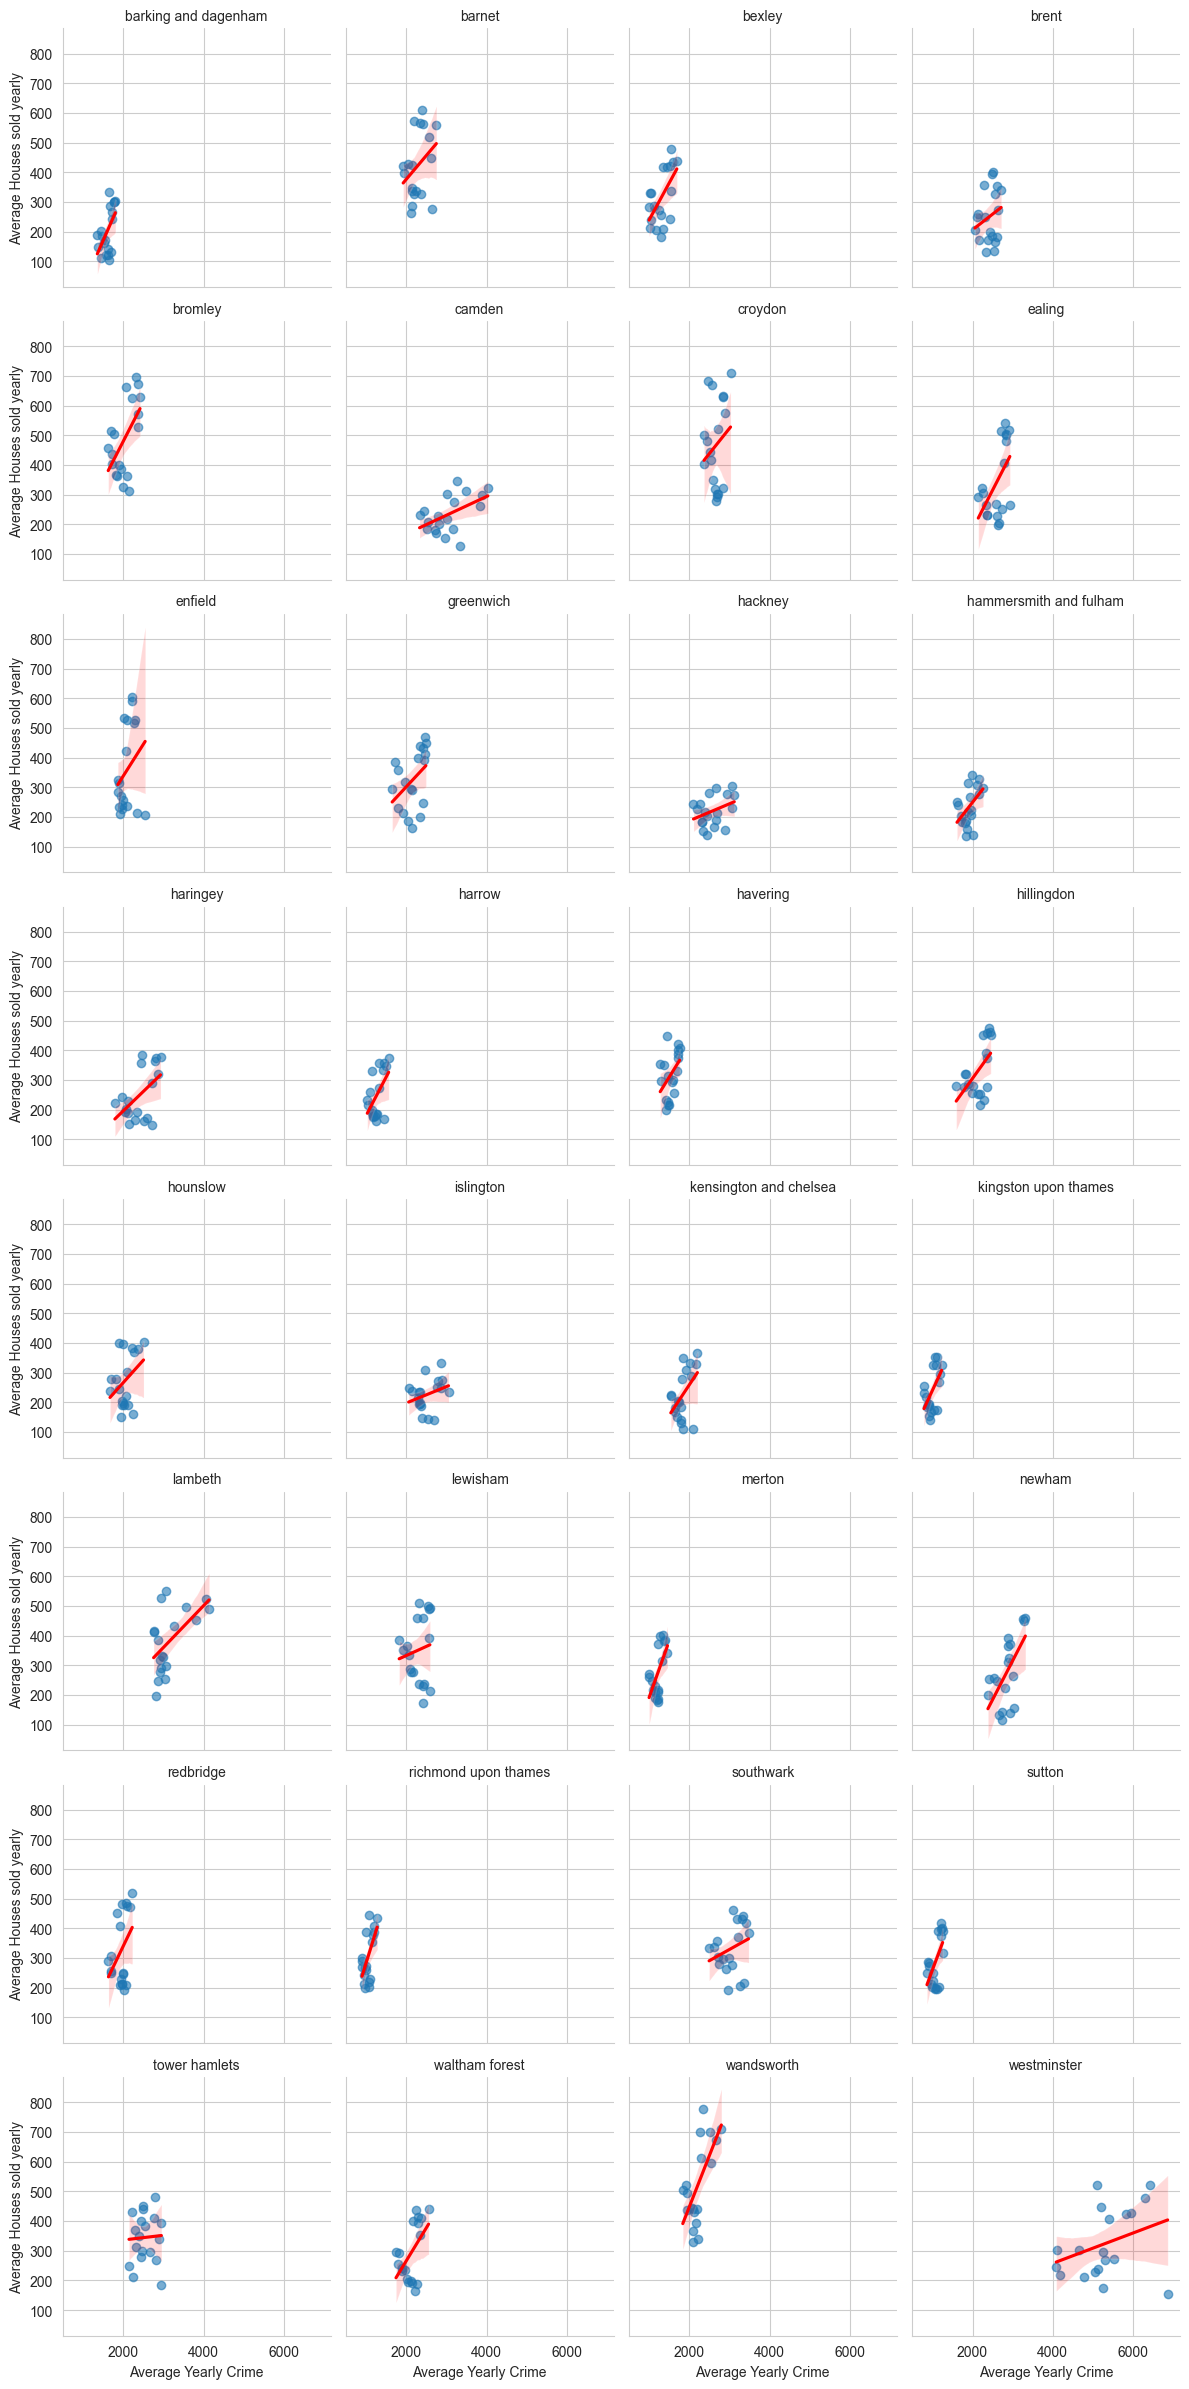

In [51]:
correlation_facet_grid_crime_houses_sold = sns.lmplot(
    data=borough_yearly_average,
    x="yearly_crimes",
    y="yearly_houses_sold",
    col="area",
    col_wrap=4,
    height=3,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)

correlation_facet_grid_crime_houses_sold.set_axis_labels("Average Yearly Crime", "Average Houses sold yearly")
correlation_facet_grid_crime_houses_sold.set_titles("{col_name}")

The figure above shows yearly crime stats vs yearly average houses sold in each area. No definitive correlation can be drawn between the two stats as the graphs show, as crime increases, more houses are sold. Logically this makes no sense and so we can say that this is not correlating accurately even though this is what the data states. This can be classed as a spurious correlation.

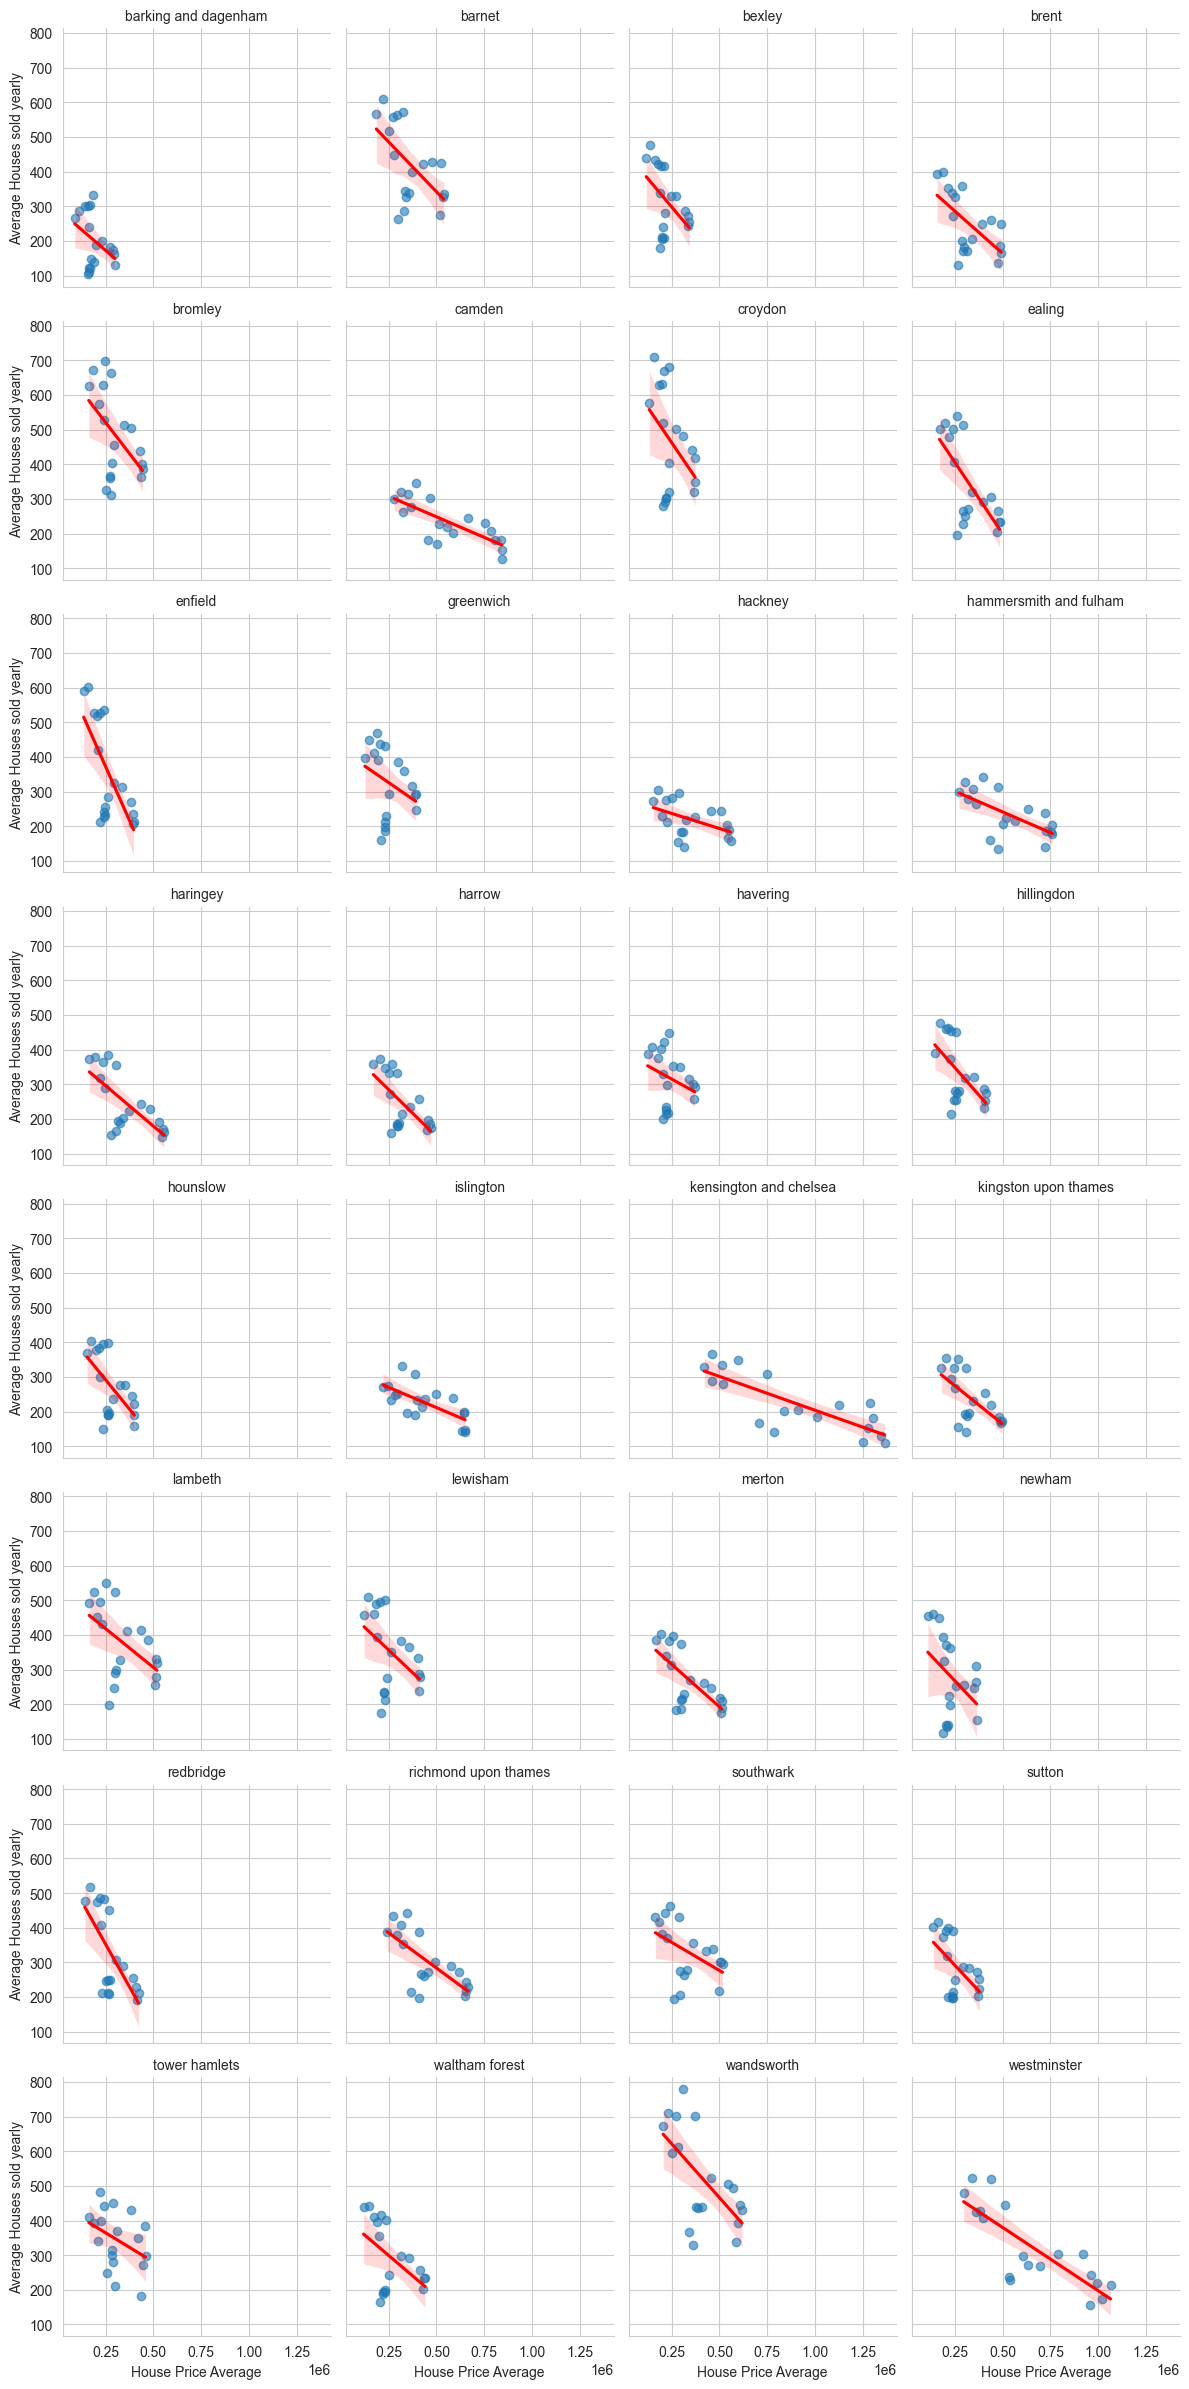

In [23]:
correlation_facet_grid_price_houses_sold = sns.lmplot(
    data=borough_yearly_average,
    x="yearly_house_price_average",
    y="yearly_houses_sold",
    col="area",
    col_wrap=4,
    height=3,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)

correlation_facet_grid_price_houses_sold.set_axis_labels("House Price Average", "Average Houses sold yearly")
correlation_facet_grid_price_houses_sold.set_titles("{col_name}")

The figure above shows yearly average house prices vs yearly average houses sold in each area. There is a correlation seen between the two stats as the graphs show, as house price increases, less houses are sold. All the graphs show a negative linear trend and so this can be said to be consistent across London and its boroughs.

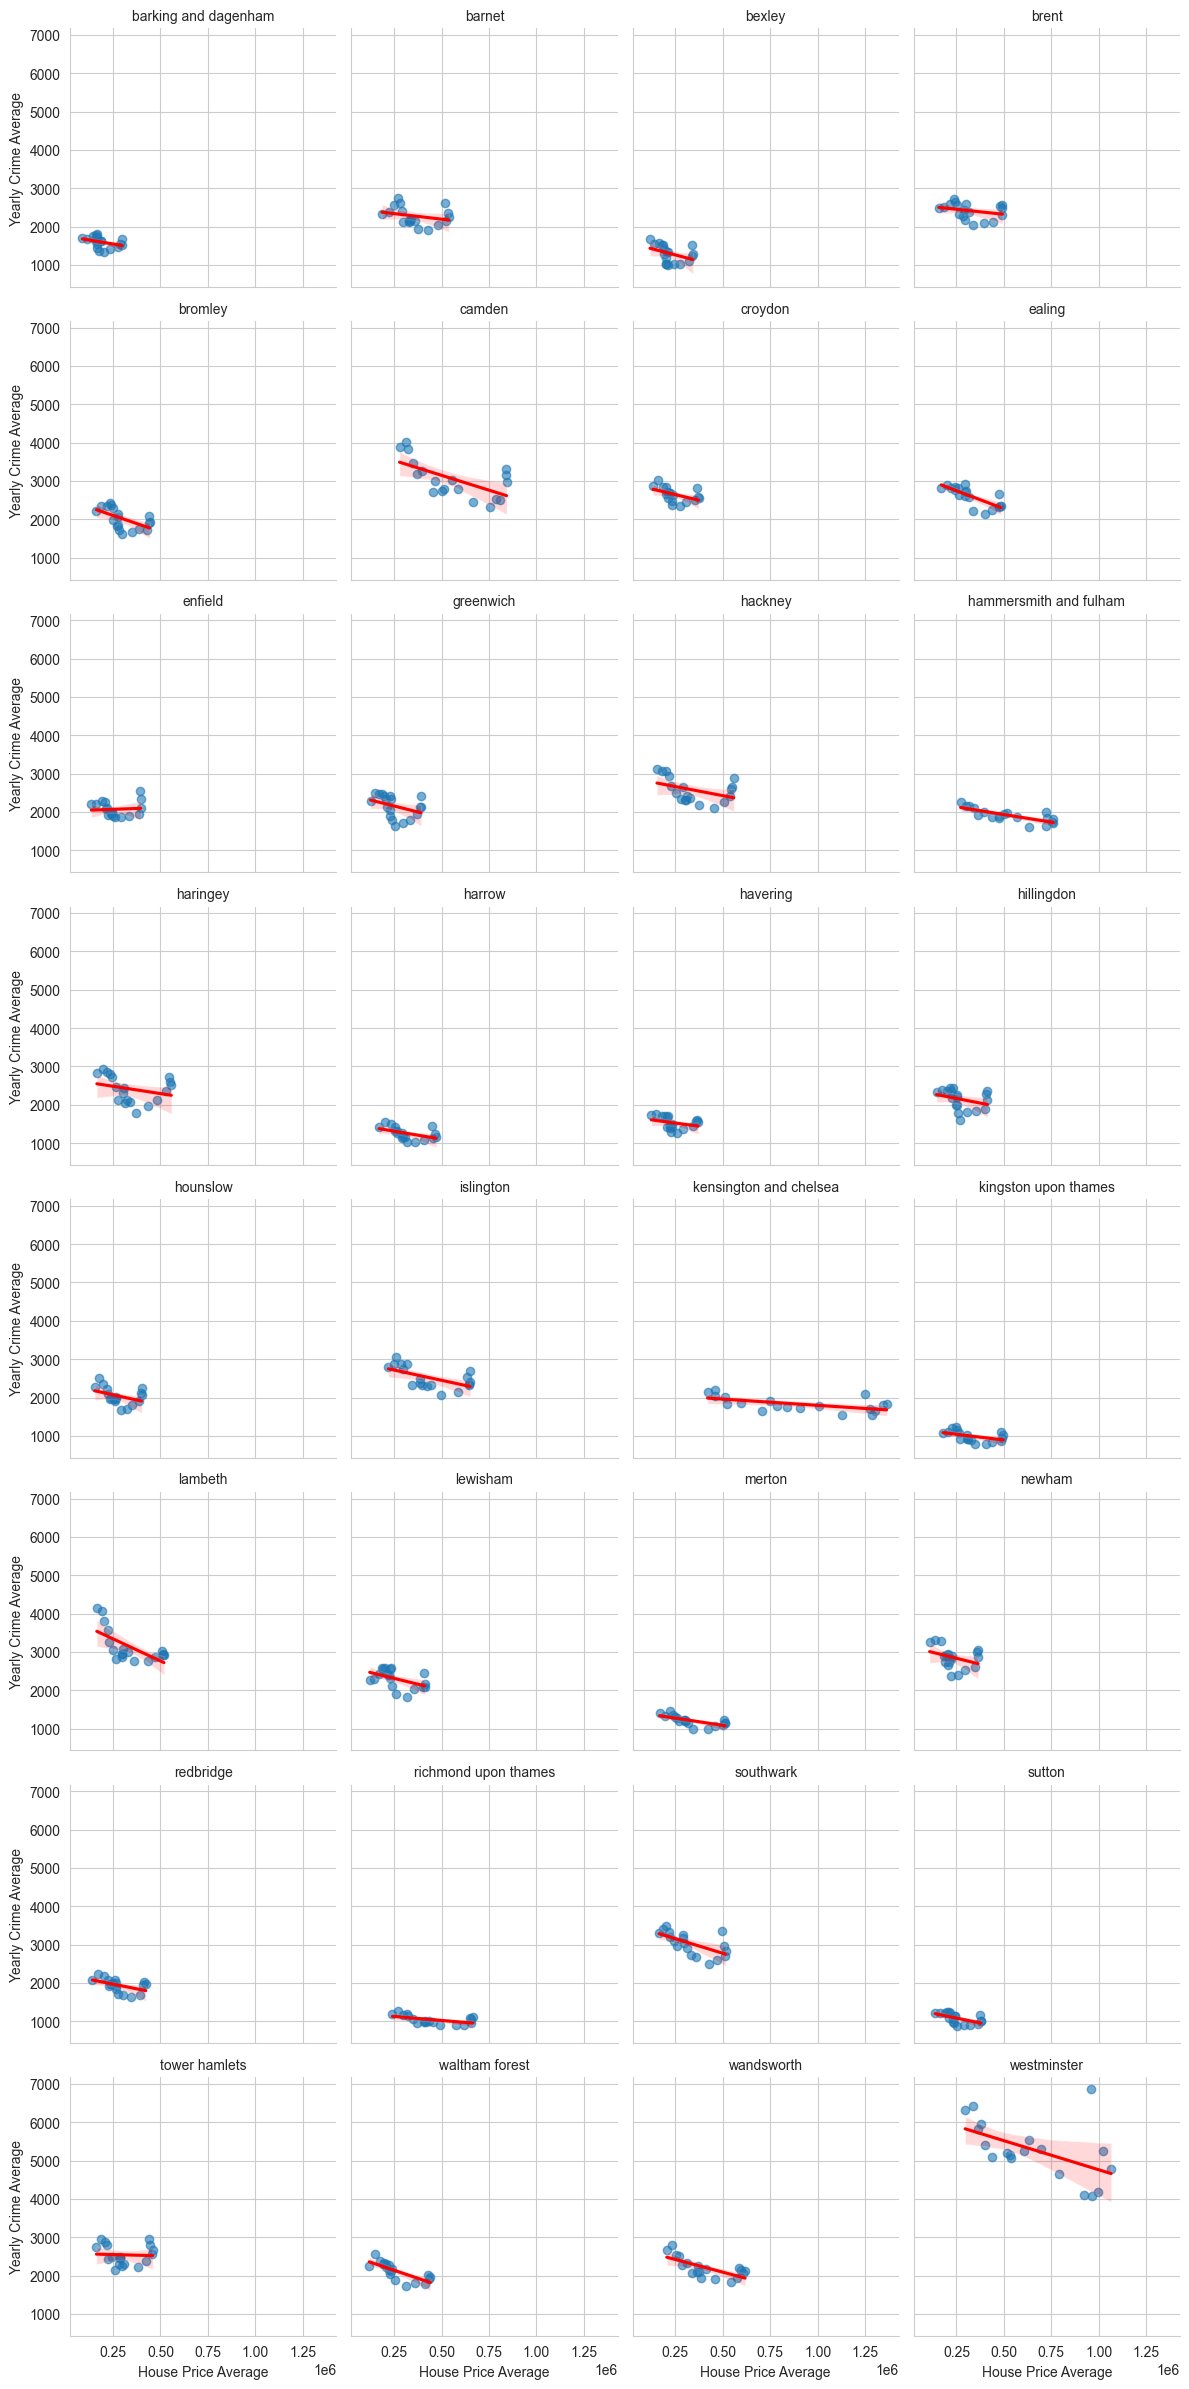

In [24]:
correlation_facet_grid_price_crimes = sns.lmplot(
    data=borough_yearly_average,
    x="yearly_house_price_average",
    y="yearly_crimes",
    col="area",
    col_wrap=4,
    height=3,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)

correlation_facet_grid_price_crimes.set_axis_labels("House Price Average", "Yearly Crime Average")
correlation_facet_grid_price_crimes.set_titles("{col_name}")

The figure above shows yearly average house prices vs yearly average crimes in each area. There is a correlation seen between the two stats as the graphs show, as house price increases, crime tends to decrease. However, not all the graphs show a negative linear trend with some boroughs such as Tower Hamlets and Enfield showing flatter lines and so this can be said to be a very common theme but not completely consistent across London and its boroughs.

---

# _Plotly_

Using Plotly I will create a scatter plot to visualise the data together.

In [60]:
fig = px.scatter(
    borough_yearly_average,
    x="yearly_house_price_average",
    y="yearly_houses_sold",
    color="yearly_crimes",
    size="yearly_crimes",
    hover_name="area",
    animation_frame="year",
    title="House Prices vs Houses Sold with Crime rate by Area",
    width=1000,
    height=600
)

fig.update_layout(
    xaxis_title="Yearly Average House Price",
    yaxis_title="Yearly Houses Sold",
)
fig.update_coloraxes(colorbar_title="Yearly Total Crimes")
fig.show()

---

# Conclusions

From the visualisations we can draw the following conclusions:

## _Matplotlib_

* The first bar chart shows London crime stats per year from all boroughs. All the borough data was accumulated and grouped by year.
* The second bar chart shows London houses sold stats per year from all boroughs. Again, all the date was accumulated and grouped by year.
* Initial views of the data shows no correlation between either chart however, deeper analysis revealed the following:

A year to year increase or decrease of crime directly affected the following year's total houses sold. E.g. The crime rate increased from 2001-2002, then the houses sold total in 2003 would be lower to the year before. Another example, between 2011-2012 the crime rate went down and so the houses sold in 2013 went up. This is a consistent trend except for around 2007. This can be considered to be affected by the recession of 2007 which also can be seen where houses sold in 2008 sees an immense drop from the year before.

## _Seaborn_

1) Facet Grid with houses sold and crime rate for each borough across the 2001-2019 time range:
    * It can be seen that in a majority of boroughs, whenever the crime rate increases, houses sold decreases. This is especially evident in the later years of the time range where in most, if not all boroughs, crime rate is seen to increase.
2) Heatmaps:
    * The first heatmap shows average crimes per area per year in each borough:
        * From this heatmap we can see that there is no consistent trend and we can determine that grouping all crimes under one banner of "crime" does not allow for reliable data. This is evident in the Westminster section of the heatmap which is a very central borough of London but compared to surrounding boroughs (such as Kensington and Chelsea and Wandsworth ) the crime stats are extremely high.
    * The second heatmap shows the houses sold per year in each borough:
        * We can see that pre-2007 there is a strong housing market in London across all boroughs.
        * It is then visible that the 2007-2008 credit crunch recession hits and the housing market drops significantly and in the following year up to 2019 (end of data), there is never a recovery to pre-2007 levels.
        * This makes it clear that there are many other factors than just crime that can affect the housing market generally and specifically to London.
    * The third heatmap shows the house price average per year in each borough:
        * This shows that regardless of outside factors, all average house prices in all boroughs have always gradually increased. Kensington and Chelsea has remained the highest throughout the whole period. This important to know as it helps us understand how factors may affect eachother or conversely how they may have no effect on another (i.e. crime rate doesn't affect the progression of average house price as much as previously considered)
3) Scatterplots:
    * Three scatterplots were created with the following:
        * Crimes vs Houses Sold
        * Crimes vs Average House Price
        * Average House Price vs Houses Sold
    * No correlation could be drawn from any of these graphs.
    * They were all done using the boroughs as one collective (London) so it was decided to do further analysis by dividing the boroughs up.
4) Facet Grids for determining correlations between boroughs:
    * All grids were split by
        * Houses sold vs Crime Rates
            * There was no definitive correlation in this analysis.
            * The trend shown seemed to be as houses sold increased, crime rate increased.
            * It is inferred that as the population of the area increased, crime rate increased but this is still inferred and not considering any other factors.
            * As a result it can be said that this might be a spurious conclusion.
        * Houses sold vs Average House Price
            * There is a definitive correlation in this analysis.
            * The trend shown is: As house prices increase, houses sold decreases.
            * It can be assumed that "more expensive" boroughs of London have lower house purchases due to the expensive prices of the properties.
        * Average house Price vs Crime Rates
            * There is a slight correlation present in most boroughs but not all.
            * As average house price increases, the crime rates of boroughs fall.
            * It can be assumed that the areas with lower crime rates cause average house prices to increase in boroughs.
            * However, there are some anomalies in Ealing and Westminster for example where crime rates remain high.
            * This can be referenced to an earlier analysis where crime can not be generalised and has to have a further in depth analysis.

## _Plotly_

* This grid shows all three data variables for all areas (averaged each year).
* The trends can be investigated and confirm all the above conclusions.
* As the slider is progressed we can see the changes in the boroughs over the dataset period (2001-2019).